In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data\sample_submission.csv
data\test.csv
data\test.parquet
data\train.csv
data\train.parquet


In [2]:
submission = pd.read_csv('data/sample_submission.csv')
submission.tail()

,id,binds
1674891,296921721,0.5
1674892,296921722,0.5
1674893,296921723,0.5
1674894,296921724,0.5
1674895,296921725,0.5


In [3]:
train = pd.read_csv('data/train.csv', nrows=1000)
train.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,BRD4,0
1,1,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,HSA,0
2,2,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,sEH,0
3,3,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,BRD4,0
4,4,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,HSA,0


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger

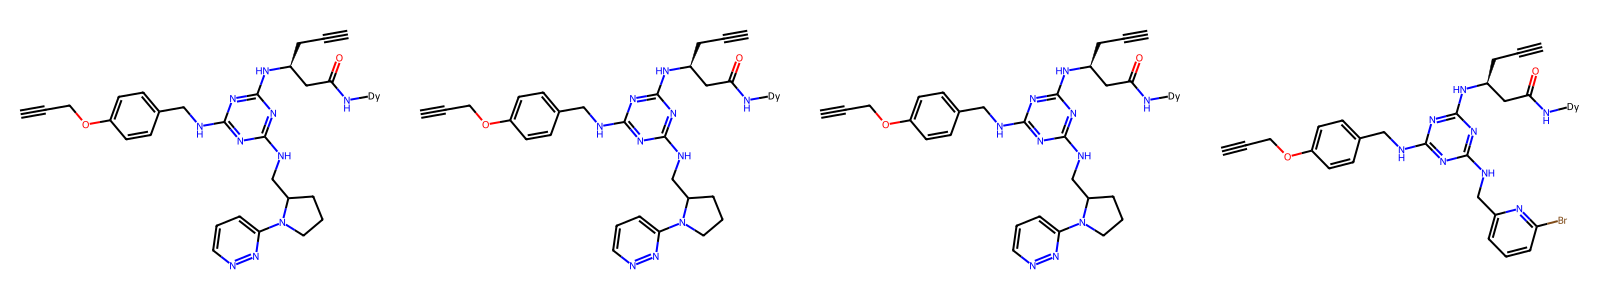

In [5]:
#https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html

#By Chemdatafarmer  https://www.kaggle.com/code/chemdatafarmer/additional-seh-data/notebook

###Visualize some of the original data
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in train['molecule_smiles'][0:4]], molsPerRow=4, subImgSize=(400,300))

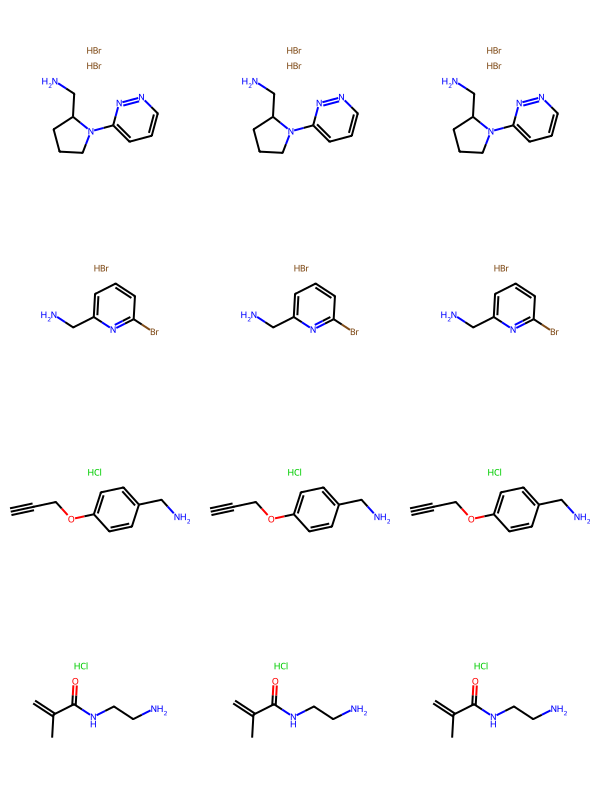

In [6]:
###Visualize some of the original data
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in train['buildingblock3_smiles'][0:12]], molsPerRow=3, subImgSize=(200,200))

In [7]:
#By Andrew D. Blevins https://www.kaggle.com/code/andrewdblevins/leash-tutorial-ecfps-and-random-forest

import duckdb
import pandas as pd

train_path = 'data/train.parquet'
test_path = 'data/test.parquet'

con = duckdb.connect()

df = con.query(f"""(SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 0
                        ORDER BY random()
                        LIMIT 30000)
                        UNION ALL
                        (SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 1
                        ORDER BY random()
                        LIMIT 30000)""").df()

con.close()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [8]:
df.tail()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
59995,188356219,O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,Nc1ccc2c(c1)OCO2,Nc1cncc(F)c1,O=C(N[Dy])c1ccc(Nc2nc(Nc3cncc(F)c3)nc(Nc3ccc4c...,HSA,1
59996,260892166,O=C(O)C[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)c1c...,Cl.Cl.NCc1nc(-c2ccncc2)no1,COC(=O)c1cncc(N)c1,COC(=O)c1cncc(Nc2nc(NCc3nc(-c4ccncc4)no3)nc(N[...,HSA,1
59997,248184126,O=C(O)C[C@@H](Cc1ccc(Cl)cc1Cl)NC(=O)OCC1c2cccc...,Nc1cc(N2CCNCC2)ccc1[N+](=O)[O-],Cl.NCc1nnc2ncccn12,O=C(C[C@@H](Cc1ccc(Cl)cc1Cl)Nc1nc(NCc2nnc3nccc...,BRD4,1
59998,82527197,O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,NCc1ccccc1N1CCOCC1,COc1nc(C)nc(N)n1,COc1nc(C)nc(Nc2nc(NCc3ccccc3N3CCOCC3)nc(NCC3CC...,sEH,1
59999,98969773,O=C(N[C@@H](Cc1ccc(F)cc1)C(=O)O)OCC1c2ccccc2-c...,Nc1ccc(N2CCC=C(N3CCOCC3)C2=O)cc1,COC(=O)c1nc(N)sc1Br,COC(=O)c1nc(Nc2nc(Nc3ccc(N4CCC=C(N5CCOCC5)C4=O...,HSA,1


In [9]:
#HSA sm_name - buildingblock1_smiles

train.iloc[1,1]

'C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21'

In [10]:
#HSA protein_name - buildingblock2_smiles

train.iloc[1,2]

'C#CCOc1ccc(CN)cc1.Cl'

In [11]:
#HSA protein_name - buildingblock3_smiles

train.iloc[1,3]

'Br.Br.NCC1CCCN1c1cccnn1'

In [12]:
#HSA protein_name - molecule_smiles

train.iloc[1,4]

'C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1'

In [13]:
train["protein_name"].value_counts()

BRD4    334
HSA     333
sEH     333
Name: protein_name, dtype: int64

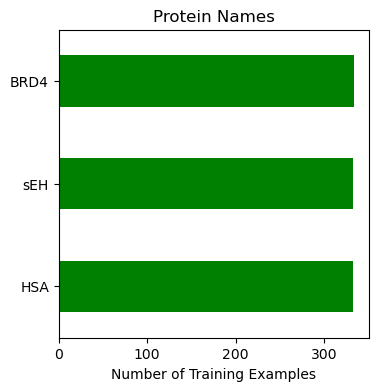

In [14]:


fig, ax = plt.subplots(figsize=(4, 4))
train["protein_name"].value_counts().head(7).sort_values(ascending=True).plot(
    kind="barh", color='g', ax=ax, title="Protein Names"
)
ax.set_xlabel("Number of Training Examples")
plt.show()

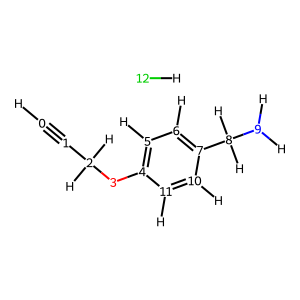

In [15]:
#https://mattermodeling.stackexchange.com/questions/6460/rdkit-and-pysmiles-results-differ-on-some-smiles-strings
#Answered by RapelPy, Jul 31, 2021

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pysmiles

s1 = 'C#CCOc1ccc(CN)cc1.Cl'  # aromatic
s2 = 'Br.Br.NCC1CCCN1c1cccnn1'  # kekulized


def show_implicit_h(smiles):
    m = Chem.MolFromSmiles(smiles)
    for atom in m.GetAtoms():
        atom.SetProp('atomLabel', str(atom.GetIdx()))
    m = Chem.AddHs(m)
    return Draw.MolToImage(m, size=(300, 300))


show_implicit_h(s1)

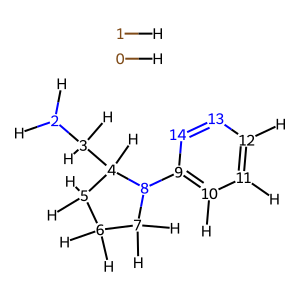

In [16]:
#https://mattermodeling.stackexchange.com/questions/6460/rdkit-and-pysmiles-results-differ-on-some-smiles-strings

show_implicit_h(s2)

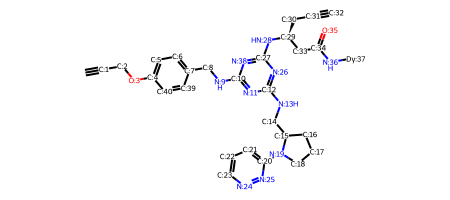

In [17]:
#By ButtonWood https://mattermodeling.stackexchange.com/questions/6460/rdkit-and-pysmiles-results-differ-on-some-smiles-strings

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

from IPython.display import SVG
IPythonConsole.ipython_useSVG=True  


def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol


mol = Chem.MolFromSmiles("C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1")
mol = mol_with_atom_index(mol)
mc = Chem.Mol(mol.ToBinary())


drawer = rdMolDraw2D.MolDraw2DSVG(450, 200) 
drawer.DrawMolecule(mc)
drawer.FinishDrawing()

svg = drawer.GetDrawingText()
display(SVG(svg.replace('svg:','')))

In [18]:
#By ButtonWood https://mattermodeling.stackexchange.com/questions/6460/rdkit-and-pysmiles-results-differ-on-some-smiles-strings

from pysmiles import read_smiles

smiles = "C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1"
molecule = read_smiles(smiles)

pysmiles_list = zip(molecule.nodes(data="SMILES"), molecule.nodes(data="hcount"))#Don't change hcount
for element in pysmiles_list:
    print(element)

Atom "[C@@H]" contains stereochemical information that will be discarded.


((0, None), (0, 1))
((1, None), (1, 0))
((2, None), (2, 2))
((3, None), (3, 0))
((4, None), (4, 0))
((5, None), (5, 1))
((6, None), (6, 1))
((7, None), (7, 0))
((8, None), (8, 2))
((9, None), (9, 1))
((10, None), (10, 0))
((11, None), (11, 0))
((12, None), (12, 0))
((13, None), (13, 1))
((14, None), (14, 2))
((15, None), (15, 1))
((16, None), (16, 2))
((17, None), (17, 2))
((18, None), (18, 2))
((19, None), (19, 0))
((20, None), (20, 0))
((21, None), (21, 1))
((22, None), (22, 1))
((23, None), (23, 1))
((24, None), (24, 0))
((25, None), (25, 0))
((26, None), (26, 0))
((27, None), (27, 0))
((28, None), (28, 1))
((29, None), (29, 1))
((30, None), (30, 2))
((31, None), (31, 0))
((32, None), (32, 1))
((33, None), (33, 2))
((34, None), (34, 0))
((35, None), (35, 0))
((36, None), (36, 1))
((37, None), (37, 0))
((38, None), (38, 0))
((39, None), (39, 1))
((40, None), (40, 1))


In [19]:
#BRD4 protein_name - molecule_smiles

train.iloc[3,4]

'C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1'

In [20]:


# Your SMILES string
smiles = "C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1"

# Convert the SMILES string to an RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Check if the conversion was successful
if mol is not None:
    # Generate a 2D depiction of the molecule
    img = Draw.MolToImage(mol)    
    # Save the image to a file
#     img.save("molecule.png")
else:
    print("Invalid SMILES string")

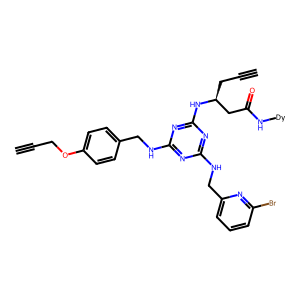

In [21]:


img

In [22]:
#Updated https://networkx.org/documentation/stable/reference/readwrite/matrix_market.html

#https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation
#By Davide Fiocco answered Jul 16, 2019

from pysmiles import read_smiles
import networkx as nx

import scipy as sp
import io  # Use BytesIO as a stand-in for a Python file object
    
smiles = 'C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1'
mol = read_smiles(smiles)
    
# atom vector (C only)
print(mol.nodes(data='SMILES'))#Don't change data
# adjacency matrix
print(nx.to_scipy_sparse_array(mol))#Original 'networkx' has no attribute 'to_numpy_matrix'     

Atom "[C@@H]" contains stereochemical information that will be discarded.


[(0, None), (1, None), (2, None), (3, None), (4, None), (5, None), (6, None), (7, None), (8, None), (9, None), (10, None), (11, None), (12, None), (13, None), (14, None), (15, None), (16, None), (17, None), (18, None), (19, None), (20, None), (21, None), (22, None), (23, None), (24, None), (25, None), (26, None), (27, None), (28, None), (29, None), (30, None), (31, None), (32, None), (33, None), (34, None), (35, None), (36, None)]
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (4, 36)	1
  (5, 4)	1
  (5, 6)	1
  (6, 5)	1
  (6, 7)	1
  (7, 6)	1
  (7, 8)	1
  (7, 35)	1
  (8, 7)	1
  (8, 9)	1
  (9, 8)	1
  (9, 10)	1
  (10, 9)	1
  (10, 11)	1
  (10, 34)	1
  (11, 10)	1
  :	:
  (24, 23)	1
  (24, 25)	1
  (25, 24)	1
  (25, 26)	1
  (25, 29)	1
  (26, 25)	1
  (26, 27)	1
  (27, 26)	1
  (27, 28)	1
  (28, 27)	1
  (29, 25)	1
  (29, 30)	1
  (30, 29)	1
  (30, 31)	1
  (30, 32)	1
  (31, 30)	1
  (32, 30)	1
  (32, 33)	1
  (33, 32)	1
  (34, 10)	1
  (34, 23)	1
 

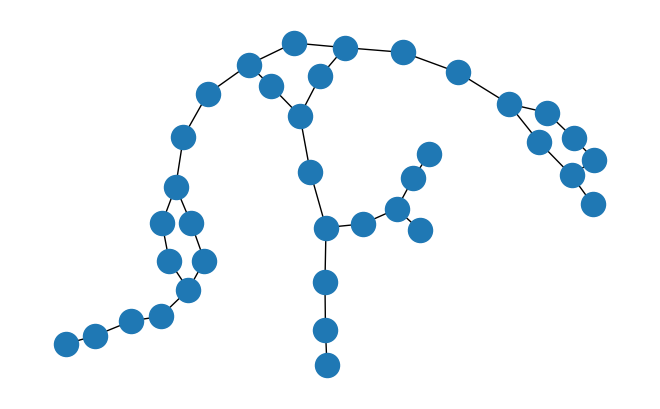

In [23]:
#By Davide Fiocco https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation

import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "SMILES")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

In [24]:
#By Davide Fiocco https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation

smiles1 = 'CC(O)Cn1cnc2c(N)ncnc21'
mol = read_smiles(smiles1)
    
# atom vector (C only)
print(mol.nodes(data='SMILES'))#Don't change data
# adjacency matrix
print(nx.to_scipy_sparse_array(mol))

[(0, None), (1, None), (2, None), (3, None), (4, None), (5, None), (6, None), (7, None), (8, None), (9, None), (10, None), (11, None), (12, None), (13, None)]
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (3, 1)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (4, 13)	1
  (5, 4)	1
  (5, 6)	1
  (6, 5)	1
  (6, 7)	1
  (7, 6)	1
  (7, 8)	1
  (7, 13)	1
  (8, 7)	1
  (8, 9)	1
  (8, 10)	1
  (9, 8)	1
  (10, 8)	1
  (10, 11)	1
  (11, 10)	1
  (11, 12)	1
  (12, 11)	1
  (12, 13)	1
  (13, 4)	1
  (13, 7)	1
  (13, 12)	1


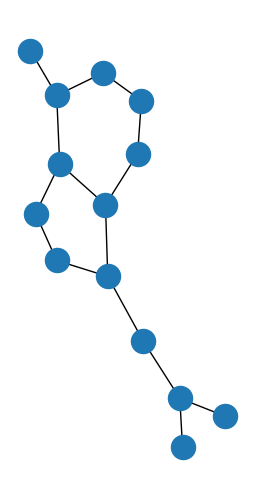

In [25]:
#By Davide Fiocco https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation

elements = nx.get_node_attributes(mol, name = "SMILES")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')